# Data handling

이 노트북을 주피터 노트북 뷰어(nbviewer.jupyter.org)로 보거나 구글 코랩(colab.research.google.com)에서 실행할 수 있습니다.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://nbviewer.jupyter.org/github/nhkim55/bigdata_fintech_python/blob/main/code/ch9_numeric.ipynb"><img src="https://jupyter.org/assets/share.png" width="60" />주피터 노트북 뷰어로 보기</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/nhkim55/bigdata_fintech_python/blob/main/code/ch9_numeric.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩(Colab)에서 실행하기</a>
  </td>
</table>

# 수치형 데이터 다루기

* 정량적 데이터(quantitative data)란 반별 학생수나 월간 매출, 시험점수와 같이 어떤 것을 측량한 결과
* 숫자로 표현됨
* 수치형 자료를 머신러닝에 적합한 특성으로 변환하는 다양한 전략들에 대해서 소개



## 특성 스케일 바꾸기

* 대부분의 알고리즘은 모든 특성이 동일한 스케일을 가지고 있다고 가정
* 스케일 조정은 머신러닝에서 흔한 전처리 작업
* 사이킷런의 MinMaxScaler를 사용해 수치형 특성이 두 값의 범위 안에 놓이도록 스케일(scale) 변경


In [1]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
feature = np.array([[-500.5],
                    [-100.1],
                    [0],
                    [100.1],
                    [900.9]])

# 스케일러 객체를 만듭니다.
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# 특성의 스케일을 변환합니다.
scaled_feature = minmax_scale.fit_transform(feature)

# 특성을 출력합니다.
scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

* 스케일 조정 방법은 다양한데 가장 간단한 방법은 최소-최대 스케일링(min-max scaling)
* 최소-최대 스케일링은 특성의 최솟값과 최댓값을 사용하여 일정 범위 안으로 값을 조정
    * 다음과 같이 계산
$$x_i'=\frac{x_i-\min(x)}{\max(x)-\min(x)}$$
    $x$는 특성 벡터이고 $x_i$는 개별 원소, $x_i'$는 스케일이 바뀐 원소

* 예제에서는 출력 배열의 스케일이 0에서 1사이로 변한 것을 확인할 수 있음  
---


* 사이킷런의 **MinMaxScaler**는 특성 스케일을 위해 두가지 방법 제공
    1. **fit** 메서드를 사용해 특성의 최솟값과 최댓값 계산한 다음 **transform** 메서드로 특성의 스케일을 조정
    2.   **fit_transform** 메서드로 두 연산을 한번에 처리

* 두 방법 사이에 계산상의 차이는 없음
* 동일한 변환을 다른 데이터 세트에 적용하려면 **fit** 메서드와 **transform** 메서드를 따로 호출해야 함



* [특성 스케일링, 위키피디아](https://ko.wikipedia.org/wiki/%ED%94%BC%EC%B3%90_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81)
* [특성 스케일링과 정규화](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

### 붙임

* 머신 러닝을 위해서는 자료를 훈련 세트(training set)와 테스트 세트(test set)로 분리해야 함
    * 훈련 세트는 모형을 학습시킬 때 사용되는 데이터 세트이며 테스트 세트는 훈련된 모형의 일반화 성능을 평가하기 위한 데이터 세트




* 훈련 세트와 테스트 세트의 스케일을 따로 조정하면 안됨
* 예를 들어 훈련 세트의 스케일을 조정하고자 구한 최솟값과 최댓값을 사용하여 테스트 세트를 변환해야 함


feature의 처음 세개를 훈련 세트, 나머지 두개를 테스트 세트라고 가정


In [2]:
# 훈련 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [3]:
# 테스트 세트를 변환합니다.
preprocessing.MinMaxScaler().fit_transform(feature[3:])

array([[0.],
       [1.]])



* 훈련 세트는 [-500.5, -100.1, 0], 테스트 세트는 [100.1, 900.9] 인데 변환 후 훈련 세트의 0과 테스트 세트의 900.9가 모두 1로 변환됨

* 데이터가 다른 스케일로 변환되면 훈련 세트에서 학습한 모델을 테스트 세트에서 사용할 수 없음



In [6]:
# 훈련 세트로 변환기를 학습합니다.
scaler = preprocessing.MinMaxScaler().fit(feature[:3])
scaler.transform(feature[:3])

array([[0. ],
       [0.8],
       [1. ]])

In [7]:
# 훈련 세트에서 학습한 변환기로 테스트 세트를 변환합니다.
scaler.transform(feature[3:])

array([[1.2],
       [2.8]])

* 훈련세트를 학습한 변환기 객체를 사용하여 원본 데이터셋과 동일한 비율로 테스트 세트를 변환

* 다음과 같은 train_test_split 함수를 이용하여 훈련세트와 테스트세트 분리 가능



``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3) 
```



## 특성 표준화

* 사이킷런의 **StandardScaler**를 사용하여 특성을 평균이 0이고 표준편차가 1이 되도록 변환

In [8]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn import preprocessing

# 특성을 만듭니다.
x = np.array([[-1000.1],
              [-200.2],
              [500.5],
              [600.6],
              [9000.9]])

# 변환기 객체를 만듭니다.
scaler = preprocessing.StandardScaler()

# 특성을 변환합니다.
standardized = scaler.fit_transform(x)

# 특성을 출력합니다.
standardized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

* 최소-최대 스케일링과 함께 특성을 표준 정규분포로 근사하는 스케일링 방식이 자주 쓰임
* 표준화를 사용하여 데이터의 평균 $\bar{x}$가 0이고 표준편차 $\sigma$가 1이 되도록 변환
    * 다음과 같이 변환
    $$x_i'=\frac{x_i-\bar{x}}{\sigma}$$
    $x'_i$는 $x_i$의 표준화된 형태
    * 변환된 특성은 원본 값이 특성 평균에서 몇 표준편차만큼 떨어져 있는지로 표현(통계학에서는 z-점수라고도 부름)
    

* 표준화는 머신러닝의 일반적인 전처리 단계에서 사용할 수 있는 믿을 만한 스케일링 방법
* 최소-최대 스케일링보다 일반적으로 쓰임
* 하지만 학습 알고리즘에 의존적
    * 예를 들어 주성분 분석은 표준화가 잘 맞지만 신경망에서는 최소-최대 스케일링을 종종 권장함
    * 일반적으로 다른 방법을 사용할 특별한 이유가 없다면 기본으로 표준화를 권장
    

In [9]:
# 평균과 표준 편차를 출력합니다.
print("평균 Mean:", round(standardized.mean()))
print("표준 편차 Standard deviation:", standardized.std())

평균 Mean: 0.0
표준 편차 Standard deviation: 1.0


* 데이터에 이상치가 많다면 특성의 평균과 표준편차에 영향을 미치기 때문에 표준화에 부정적인 효과를 끼침
* 이런 경우에는 중간값과 사분위 범위를 사용하여 특성의 스케일을 조정
* 사이킷런의 **RobustScaler**가 이런 방법을 제공

In [10]:
# 변환기 객체를 만듭니다.
robust_scaler = preprocessing.RobustScaler()

# 특성을 변환합니다.
robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

### 붙임

* 데이터를 오름차순으로 나열했을 때 75%에 위치한 값(3사분위수)과 25%에 위치한 값(1사분위수)의 차를 사분위범위(interquatile range, IQR)이라고 함
* RobustScaler는 데이터에서 중간값을 빼고 IQR로 나눔

In [11]:
interquatile_range = x[3] - x[1]
(x - np.median(x)) / interquatile_range

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

* QuantileTransformer는 훈련 데이터를 1,000개의 분위로 나누어 0~~1 사이에 고르게 분포시킴으로써 이상치로 인한 영향을 줄임
* 예를 들어 특성 x는 다섯개의 샘플을 가지고 있으므로 0%, 25%, 50%, 75%, 100%의 위치에 할당

In [12]:
preprocessing.QuantileTransformer().fit_transform(x)

C:\Users\nhkim\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

## 정규화

* norm 매개변수와 함께 Normalizer 클래스를 사용하여 샘플의 특성값을 전체 길이가 1인 단위 norm이 되도록 변환
    * Norm 이란 선형대수에서 벡터의 크기를 측정하는 방법을 의미

In [13]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Normalizer

# 특성 행렬을 만듭니다.
features = np.array([[0.5, 0.5],
                     [1.1, 3.4],
                     [1.5, 20.2],
                     [1.63, 34.4],
                     [10.9, 3.3]])

# 변환기 객체를 만듭니다.
normalizer = Normalizer(norm="l2")

# 특성 행렬을 변환합니다.
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

* 많은 스케일링 방법이 특성별로 적용되지만 샘플별로 스케일을 바꿀 수도 있음
* Normalizer는 단위 norm(길이의 합이 1)이 되도록 개별 샘플의 값을 변환
* 이런 종류의 스케일링은 유사한 특성이 많을 때 종종 사용(예를 들어 각 단어나 n개의 단어 그룹이 특성인 텍스트 분류)

* Normalizer는 세 가지 norm 옵션을 제공$.$
    1. 기본값은 $L2$ norm(Euclidean norm), "l2"
    2. $L1$ norm(Manhattan norm), "l1"
    3. $L_\infty$ (max norm), "max"




* $L2$ norm(유클리드 노름)
$$||x||_2=\sqrt{x_1^2+x_2^2+...+x_n^2}$$
$x$는 개별 샘플이고 $x_n$는 샘플의 n번째 특성값

In [14]:
# 특성 행렬을 변환합니다.
features_l2_norm = Normalizer(norm="l2").transform(features)

# 특성 행렬을 출력합니다.
features_l2_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

* $L1$ norm(맨해튼 노름)
$$||x||_1=\sum_{i=1}^n|x_i|$$

In [15]:
# 특성 행렬을 변환합니다.
features_l1_norm = Normalizer(norm="l1").transform(features)

# 특성 행렬을 출력합니다.
features_l1_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

직관적으로 생각했을 때 L2 norm은 뉴욕의 두 지점 사이를 잇는 직선 거리로 볼 수 있음. 
L1 norm은 사람이 도로를 따라 걷는 것과 같음. 그래서 '맨해튼 노름' 또는 '택시 노름'으로 불림

norm='l1'은 각 샘플 특성값의 합을 1로 만듬. 실제 이런 성질이 가끔 필요할 때가 있음

In [16]:
# 합을 출력합니다.
print("첫 번째 샘플 값의 합:",
   features_l1_norm[0, 0] + features_l1_norm[0, 1])

첫 번째 샘플 값의 합: 1.0


### 붙임

Normalizer는 행 단위로 변환되므로 fit메서드는 아무런 작업을 수행하지 않기 때문에 바로 transform 메서드를 사용할 수 있음. 
'l1'과 'l2' 옵션의 변환은 각 행의 L1 노름과 L2 노름을 구해 나누는 것

In [17]:
# L1 노름을 사용한 변환.
# 각 행(axis=1)을 합한 결과가 2차원 배열로 유지되도록 keepdims를 True로 설정합니다.
features / np.sum(np.abs(features), axis=1, keepdims=True)

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

In [18]:
# L2 노름을 사용한 변환.
features / np.sqrt(np.sum(np.square(features), axis=1, keepdims=True))

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

Normalizer의 norm 매개변수에 지정할 수 있는 다른 한가지 옵션은 'max'
이 옵션은 단순히 각 행의 최댓값으로 행의 값을 나눔
* $L_\infty$ norm(max norm)
$$||x||_\infty = \max(x_1, x_2,..., x_n)$$

In [19]:
# 각 행에서 최댓값으로 나눕니다.
Normalizer(norm="max").transform(features)

array([[1.        , 1.        ],
       [0.32352941, 1.        ],
       [0.07425743, 1.        ],
       [0.04738372, 1.        ],
       [1.        , 0.30275229]])

## 다항 특성과 교차항 특성 생성하기

* 다항 특성과 교차항 특성을 추가하고자 할 경우 수동으로 만들기도 하지만 사이킷런에 기능이 포함되어 있음

In [20]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# PolynomialFeatures 객체를 만듭니다.
polynomial_interaction = PolynomialFeatures(degree=2, include_bias=False)

# 다항 특성을 만듭니다.
polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

* PolynomialFeatures의 degree 매개변수가 다항식의 최대 차수 결정
    * 예를 들어 degree=2는 2제곱까지 새로운 특성을 생성    
$$x_1,x_2,x_1^2,x_2^2$$

    * degree=3은 2제곱과 3제곱까지 새로운 특성을 생성
$$x_1, x_2, x_1^2, x_2^2, x_1^3, x_2^3$$

* 기본적으로 PolynomialFeatures는 교차항을 포함
$$x_1x_2$$

    * interaction_only=True로 지정하면 교차항특성만 만들 수 있음

In [21]:
interaction = PolynomialFeatures(degree=2, 
                                 interaction_only=True, include_bias=False)
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

* 특성과 타깃 사이에 비선형 관계가 있다는 가정을 추가할 때 다항 특성을 종종 만듬$.$ 
    * 예를 들어 주요 질병에 걸릴 확률에 나이가 미치는 영향은 일정한 상숫값이 아니고 나이가 증가함에 따라 같이 증가한다는 의심을 할 수 있음. 
    * 특성 x에 변동 효과를 주입하기 위해서 고차항 특성을 만들 수 있음($x^2$, $x^3$ 등)

* 또한 한 특성의 효과가 다른 특성에 의존하는 경우를 자주 만나게됨
    * 예를 들어 커피가 달달한지 예측하는 문제에서 1) 커피를 저었는지 여부 2) 설탕을 넣었는지 여부 라는 두개의 특성이 있을 경우 각 특성은 독립적으로는 커피의 당도를 예측하지 못하지만 이 둘의 조합은 가능
    * 타깃(달달함)에 대한 각 특성의 영향은 서로에게 종속적임.
    * 개별 특성을 곱한 교차항을 특성에 추가하여 이런 관계를 인코딩할 수 있음


In [22]:
# 상수항 1을 추가합니다.
polynomial_bias = PolynomialFeatures(degree=2, include_bias=True).fit(features)
polynomial_bias.transform(features)

array([[1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.],
       [1., 2., 3., 4., 6., 9.]])

include_bias 매개변수의 기본값은 True. 이 설정은 변환된 특성에 상수항 1을 추가함

In [ ]:
polynomial_bias.get_feature_names()

['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

get_feature_names 메서드는 특성 변환 식을 이름으로 반환

## 특성 변환

* 하나 이상의 특성에 사용자 정의 변환을 적용하고 싶을 경우 사이킷런의 FunctionTransformer를 사용하여 일련의 특성에 어떤 함수를 적용할 수 있음. 

In [23]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import FunctionTransformer

# 특성 행렬을 만듭니다.
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

# 간단한 함수를 정의합니다.
def add_ten(x):
    return x + 10

# 변환기 객체를 만듭니다.
ten_transformer = FunctionTransformer(add_ten)

# 특성 행렬을 변환합니다.
ten_transformer.transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

* 판다스의 apply메서드를 사용하여 동일한 변환을 수행할 수 있음 


In [24]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
df = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 함수를 적용합니다.
df.apply(add_ten)

,feature_1,feature_2
0,12,13
1,12,13
2,12,13


* 하나 이상의 특성에 사용자 정의 변환이 필요한 경우는 흔함 
    * 예를 들면 특성값에 자연 로그를 취한 특성을 만들어야하는 경우, 함수를 하나 만들고 사이킷런이나 판다스의  apply를 사용하여 특성에 매핑
    * 예제 코드의 10을 더해주는 아주 간단한 함수 뿐 아니라 훨씬 더 복잡한 함수도 적용가능

### 붙임

* FunctionTransformer의 validate 매개변수가 True이면 입력값이 2차원 배열인지 확인하고 아닐 경우 예외를 발생시킴. 기본값은 False

In [25]:
FunctionTransformer(add_ten, validate=False).transform(np.array([1, 2, 3]))

array([11, 12, 13])

* ColumnTransformer를 사용하면 특성 배열이나 데이터프레임의 열마다 다른 변환을 적용할 수 있음
    * 예를 들어 feature_1 열은  10을 더하고 feature_2 열은 100을 더한다고 가정하면 다음과 같이 만들 수 있음.

In [26]:
from sklearn.compose import ColumnTransformer

# 100을 더하는 함수를 만듭니다.
def add_hundred(x):
    return x + 100

# (이름, 변환기, 열 리스트)로 구성된 튜플의 리스트를 ColumnTransformer에 전달합니다.
ct = ColumnTransformer(
    [("add_ten", FunctionTransformer(add_ten, validate=True), ['feature_1']),
     ("add_hundred", FunctionTransformer(add_hundred, validate=True), ['feature_2'])])

ct.fit_transform(df)

array([[ 12, 103],
       [ 12, 103],
       [ 12, 103]])

## 이상치 감지

* 데이터 중에서 아주 예외적인 샘플을 이상치라 하며 이상치 감지는 과학보다는 예술에 가까움
* 일반적인 방법은 데이터가 정규분포를 따른다고 가정하고 이런 가정을 기반으로 데이터를 둘러싼 타원을 그림. 
    * 이 타원 안의 샘플을 정상치(레이블 1)로 분류하고, 타원 밖의 샘플은 이상치(레이블 -1)로 분류

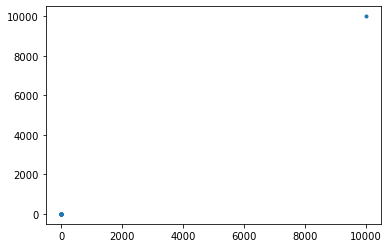

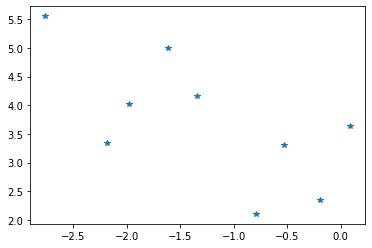

In [27]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 모의 데이터를 만듭니다.
features, _ = make_blobs(n_samples = 10,
                         n_features = 2,
                         centers = 1,
                         random_state = 1)

# 첫 번째 샘플을 극단적인 값으로 바꿉니다.
features[0,0] = 10000
features[0,1] = 10000


# 그래프 그려서 확인
plt.plot(features[:,0],features[:,1],'.')
plt.show()

plt.plot(features[1:,0],features[1:,1],'*')
plt.show()

In [28]:
# 이상치 감지 객체를 만듭니다.
outlier_detector = EllipticEnvelope(contamination=.1)

# 감지 객체를 훈련합니다.
outlier_detector.fit(features)

# 이상치를 예측합니다.
outlier_detector.predict(features)

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

* 위 방식의 주요 단점은 이상치의 비율을 정하는 contamination 매개변수를 지정해야 한다는 것
* 실제로 이 비율은 알지 못하기 때문에 사용자가 지정해줘야함. 


* 샘플을 전체적으로 보는 것보다 개별 특성에서 사분위범위(IQR)를 사용하여 극단적인 값을 구별할 수 있음(상자그림에서의 이상치 탐지와 같은 원리)

In [29]:
# 하나의 특성을 만듭니다.
feature = features[:,0]

# 이상치의 인덱스를 반환하는 함수를 만듭니다.
def indicies_of_outliers(x):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

# 함수를 실행합니다.
indicies_of_outliers(feature)

(array([0], dtype=int64),)

* IQR은 데이터에 있는 1사분위수와 3사분위 사이의 거리
* IQR은 데이터의 대부분이 퍼져 있는 곳으로 생각할 수 있음
* 이상치는 데이터가 집중되어 있는 이 지역에서 멀리 떨어진 샘플
* 보통 이상치는 1사분위보다 1.5 IQR이상 작은 값이나 3사분위보다 1.5 IQR 큰 값으로 정의

* 이상치를 감지하는 최선의 방법은 없음. 
* 일련의 도구들은 저마다 장단점을 가짐
* 최선의 전략은 여러 가지 방법을 시도해보고 종합적으로 결과를 살펴보는 것


* 가능하다면 이상치로 감지한 샘플을 살펴보고 이해하려고 노력해야 함
    * 예를 들어 주택 데이터셋에 방의 개수를 나타내는 특성이 있을 때 100개의 방을 가진 집은 이상치일수도 있고 아니면 실제 호텔을 잘못 분류한 것일 수도 있음. 
    

[이상치를 감지하는 세 가지 방법](http://colingorrie.github.io/outlier-detection.html)

## 이상치 다루기

* 일반적으로 이상치를 다루는 전략은 세가지
    1. 이상치를 삭제
    2. 이상치를 표시하고 이를 특성의 하나로 포함
    3. 이상치의 영향이 줄어들도록 특성을 변환

* 이상치를 삭제하는 방법

In [30]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터프레임을 만듭니다.
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]

# 샘플을 필터링합니다.
houses[houses['Bathrooms'] < 20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


* 이상치로 표시하고 이를 특성의 하나로 포함

In [31]:
# 라이브러리를 임포트합니다.
import numpy as np

# 불리언 조건을 기반으로 특성을 만듭니다.
houses["Outlier"] = np.where(houses["Bathrooms"] < 20, 0, 1)

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


* 이상치의 영향이 줄어들도록 특성을 변환

In [32]:
# 로그 특성
houses["Log_Of_Square_Feet"] = [np.log(x) for x in houses["Square_Feet"]]

# 데이터를 확인합니다.
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


* 이상치 감지와 마찬가지로, 이상치를 다룰 때 언제나 적용할 수 있는 좋은 처리 방법은 없음
* 두 가지 측면에서 처리 방법을 고려
    1. 어떤 것을 이상치로 간주할 것인지 생각
        * 고장난 센서나 잘못 인코딩된 값 때문에 데이터에 오류가 있다고 생각되면 이값을 신뢰할 수 없으므로 이 샘플을 삭제하거나 이상치를 NaN으로 바꿀 수 있음
        * 극단적인 값을 가진 샘플이라면 이를 이상치로 표시하거나 적절한 값으로 변환
    2. 이상치를 다루는 방법이 머신러닝의 목적에 맞아야 함
        * 예를 들어 집의 특성값을 기반으로 주택 가격을 예측한다면 100개의 방을 가진 집의 가격은 일반적인 주택과 다른 방식으로 정해진다고 가정할 수 있음. 
        * 온라인 주택 대출 웹 애플리케이션의 일부로 머신러닝 모델을 훈련한다면 잠재 고객 중에 100개의 방을 가진 집을 구입할 만한 사람은 없을 것이므로 제거  

* 이상치가 있을 경우 이상치는 평균과 분산에 영향을 끼치기 때문에 표준화가 적절하지 않음. 
* RobustScaler와 같이 이상치에 민감하지 않은 스케일링 방법을 사용

[RobustScaler 문서](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

## 특성 이산화

* 수치 특성을 개별적인 구간으로 나누고 싶을 때(이산화) 두가지 방법이 존재
    1. 임곗값에 따라 특성을 둘로 나누는 방법
    2. 수치 특성을 여러 임곗값에 따라 나누는 방법 

* 임곗값에 따라 특성을 둘로 나누는 방법

In [7]:
# 라이브러리를 임포트합니다.
import numpy as np
from sklearn.preprocessing import Binarizer

# 특성을 만듭니다.
age = np.array([[6],
                [12],
                [20],
                [36],
                [65]])

# Binarizer 객체를 만듭니다.
binarizer = Binarizer(threshold=18)

# 특성을 변환합니다.
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

* 여러 임곗값에 따라 나누는 방법

In [8]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

* bins 매개변수의 입력값은 각 구간의 왼쪽 경곗값
    * 예를 들어 20까지 구간에는 값이 20인 원소가 포함되지 않고 20보다 작은 두 개만 포함
    * right 매개변수를 True로 설정하면 이 동작을 바꿀 수 있음


In [9]:
# 특성을 나눕니다.
np.digitize(age, bins=[20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]], dtype=int64)

* 이산화는 수치 특성을 범주형처럼 다루어야할 때 유용한 전략
    * 예를 들어 17세와 18세의 소비 습관은 차이가 매우 작지만 18세와 19세 사이는 차이가 클 수 있음(우리나라에서 술을 구입할 수 있는 나이)
    * 이런 경우엔 술을 마실 수 있는 사람과 그렇지 않은 사람으로 구분하는 것이 좋음
    * 경우에 따라서는 세 개나 그 이상의 구간으로 나누는 것이 좋을 수도 있음

* 이산화 방법에서 두 개의 구간으로 나누는 사이킷런의 Binarizer와 세 개 이상의 구간으로 나누는 넘파이의 digitize 사용
* 넘파이의 digitzie에 하나의 임곗값만 지정하면 Binarizer처럼 특성을 두 개의 구간으로 나눌 수 있음

In [10]:
# 특성을 나눕니다.
np.digitize(age, bins=[18])

array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

### 붙임

사이킷런에서도 연속적인 특성값을 여러 구간으로 나누어주는 KBinsDiscretizer 클래스가 존재
* 이 클래스는 나눌 구간 개수를 지정

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

# 네 개의 구간으로 나눕니다.
kb = KBinsDiscretizer(4, encode='ordinal', strategy='quantile')
kb.fit_transform(age)

array([[0.],
       [1.],
       [2.],
       [3.],
       [3.]])

* encode 매개변수의 기본값은 'onehot'으로 원-핫 인코딩(one-hot encoding)된 희소 행렬을 반환함
* 'onehot-dense'는 원-핫 인코딩된 밀집 배열을 반환
* 연속된 값을 이산화하여 원-핫 인코딩으로 만들면 범주형 특성으로 다루기 편리


In [12]:
# 원-핫 인코딩을 반환합니다.
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [13]:
# 원-핫 인코딩된 희소 행렬을 반환합니다.
kb = KBinsDiscretizer(4, encode='onehot', strategy='quantile')
mat = kb.fit_transform(age)
[mat.indptr, mat.indices]

[array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 3])]

* strategy 매개변수의 기본값은 'quantile'로 각 구간에 포함된 샘플 개수가 비슷하도록 만들어줌
* 'uniform'은 구간의 폭이 동일하도록 만들어줌


In [14]:
# 동일한 길이의 구간을 만듭니다.
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy='uniform')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

구간은 bin_edges_ 속성에서 확인

In [15]:
kb.bin_edges_

array([array([ 6.  , 20.75, 35.5 , 50.25, 65.  ])], dtype=object)

* 시작과 끝 경계는 처음과 마지막 구간에 포함
* 나머지 경곗값은 왼쪽 경계를 나타냄
    * 즉 첫번째 구간은 [6.0, 20.75)이고 두번째 구간은 [20.75, 35.5)가 되는 식

## 군집으로 샘플을 그룹으로 묶기

* 비슷한 샘플을 그룹으로 모으고 싶을 경우 
* k개의 그룹이 있다는 것을 안다면 k-평균 군집(k-means clustering)을 사용하여 비슷한 샘플을 그룹핑할 수 있음
* 각 샘플의 소속 그룹이 새로운 특성이 됨


In [40]:
# 라이브러리를 임포트합니다.
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 모의 특성 행렬을 만듭니다.
features, _ = make_blobs(n_samples = 50,
                         n_features = 2,
                         centers = 3,
                         random_state = 1)

# 데이터프레임을 만듭니다.
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# k-평균 군집 모델을 만듭니다.
clusterer = KMeans(3, random_state=0)

# 모델을 훈련합니다.
clusterer.fit(features)

# 그룹 소속을 예측합니다.
dataframe["group"] = clusterer.predict(features)

# 처음 몇 개의 샘플을 조회합니다.
dataframe.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,2
1,-7.287210,-8.353986,0
2,-6.943061,-7.023744,0
3,-7.440167,-8.791959,0
4,-6.641388,-8.075888,0


* 다양한 군집 알고리즘을 전처리 단계에서 사용할 수 있음
* 최종 목적은 비슷한 샘플이 모인 그룹을 나타내는 범주형 특성을 생성하는 것

## 누락된 값을 가진 샘플을 삭제하기

* 누락된 값이 있는 샘플을 삭제하고자 할 때 넘파이에서는 간단하게 가능

In [ ]:
# 라이브러리를 임포트합니다.
import numpy as np

# 특성 행렬을 만듭니다.
features = np.array([[1.1, 11.1],
                     [2.2, 22.2],
                     [3.3, 33.3],
                     [4.4, 44.4],
                     [np.nan, 55]])

# (~ 연산자를 사용하여) 누락된 값이 없는 샘플만 남깁니다.
features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

* 판다스를 이용하여 누락된 값이 있는 샘플을 삭제할 수 있음 

In [ ]:
# 라이브러리를 임포트합니다.
import pandas as pd

# 데이터를 적재합니다.
dataframe = pd.DataFrame(features, columns=["feature_1", "feature_2"])

# 누락된 값이 있는 샘플을 제거합니다.
dataframe.dropna()

,feature_1,feature_2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


* 대부분의 머신러닝 알고리즘은 타깃과 특성 행렬에 있는 누락된 값을 다룰 수 없음
이런 이유 때문에 데이터에 있는 누락된 값을 무시할 수 없고 전처리 과정에서 처리해주어야 함
* 가장 간단한 해결은 하나 이상 누락된 값을 가진 샘플을 삭제하는 것
    * 누락된 값을 있는 샘플을 삭제할 때는 매우 조심해야 함. 샘플 삭제는 최후의 수단. 일단 삭제되면 알고리즘은 그 샘플에 있는 다른 정보를 얻을 수 없음

* 누락된 값의 원인에 따라 샘플 삭제는 데이터의 편향을 늘린다는 사실도 중요. 
* 누락된 데이터에는 세 가지 종류가 있음 
  * 완전히 랜덤하게 누락(MCAR)
    * 값이 누락될 확률이 모든 것에 독립적
  * 랜덤하게 누락(MAR)
    * 값이 누락될 확률이 완전히 랜덤하지 않고 다른 특성에서 얻은 정보에 의존
    * 예를 들어 결혼 여부와 자녀 유무에 관히 질문한다고 가정할 때, 미혼자는 자녀 유무 항목을 건너뛸 가능성이 높음
    * 이 때 자녀 유무 항목의 응답 여부는 결혼 여부 특성에서 얻은 정보에 의존
  * 랜덤하지 않게 누락(MNAR)
    * 값이 누락될 확률이 랜덤하지 않고 특성에서 잡지 못한 정보에 의존
    * 예를 들어 설문에는 결혼 여부에 관한 질문이 있고, 미혼자는 자녀 유무 항목을 건너 뛸 가능성이 높지만, 데이터에 결혼 여부에 관한 특성이 포함되지 않은 경우 

* MCAR이나 MAR이면 이따금 샘플을 삭제해도 괜찮음
* MNAR이면 값이 누락되는 사실 자체가 정보. 
  * MNAR인 샘플을 삭제하면 데이터에 편향을 추가하게 됨. 
  * 관측하지 못한 구조적인 영향으로 샘플을 삭제하기 때문


* [누락된 데이터의 세 가지 종류](https://measuringu.com/missing-data/)
* [누락된 데이터 채우기](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)

## 누락된 값을 채우기

* 데이터에 누락된 값이 있을 때 이를 채우거나 값을 예측
* 데이터의 양이 작으면 k-최근접 이웃(k-nearest neighbors, KNN) 알고리즘 사용 누락된 값 예측

In [2]:
pip install fancyimpute

Processing c:\users\nhkim\appdata\local\pip\cache\wheels\45\e1\7c\5f6e503d959df84af6d91e87ae288961a906f895d910f6533b\fancyimpute-0.7.0-py3-none-any.whl
  Using cached cvxpy-1.1.18-cp38-cp38-win_amd64.whl (799 kB)
  Using cached cvxopt-1.2.7-cp38-cp38-win_amd64.whl (9.5 MB)
  Using cached scs-3.1.0-cp38-cp38-win_amd64.whl (8.1 MB)
  Using cached osqp-0.6.2.post5-cp38-cp38-win_amd64.whl (278 kB)
  Using cached ecos-2.0.10-cp38-cp38-win_amd64.whl (68 kB)
  Using cached qdldl-0.1.5.post0-cp38-cp38-win_amd64.whl (74 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# 라이브러리를 임포트합니다.
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 모의 특성 행렬을 만듭니다.
features, _ = make_blobs(n_samples = 1000,
                         n_features = 2,
                         random_state = 1)

# 특성을 표준화합니다.
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# 첫 번째 샘플의 첫 번째 특성을 삭제합니다.
true_value = standardized_features[0,0]
standardized_features[0,0] = np.nan

# 특성 행렬에 있는 누락된 값을 예측합니다.
features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standardized_features)

# 실제 값과 대체된 값을 비교합니다.
print("실제 값:", true_value)
print("대체된 값:", features_knn_imputed[0,0])


실제 값: 0.8730186113995938
대체된 값: 1.0955332713113226


### 붙임

* SimpleImputer 클래스를 사용하여 특성의 평균, 중간값, 최빈값, 고정값으로 누락된 값을 채울 수 있음

* strategy 매개변수는 평균값으로 채우는 'mean', 중간값으로 채우는 'median', 가장 자주 등장하는 값으로 채우는 'most_frequent', 고정값으로 채우는 'constant'가 있음
* 'constant' 일 때 fill_value 매개변수에 지정된 값으로 누락된 값을 대체

In [4]:
from sklearn.impute import SimpleImputer

simple_imputer = SimpleImputer()
features_simple_imputed = simple_imputer.fit_transform(standardized_features)

# 실제 값과 대체된 값을 비교합니다.
print("실제 값 True Value:", true_value)
print("대체된 값 Imputed Value:", features_simple_imputed[0,0])

실제 값 True Value: 0.8730186113995938
대체된 값 Imputed Value: -0.000873892503901796


* 누락된 데이터를 다른 값으로 대체하는 두 전략은 각기 장단점이 있음
* 머신러닝을 사용하여 누락된 값을 예측할 경우 
  * 누락된 값이 있는 특성을 타깃으로 하고, 남은 특성으로 누락된 값을 예측
  * KNN이 즐겨 사용됨
  * KNN은 가장 가까이 있는 k개의 샘플을 사용해 누락된 값을 예측(기본값은 weighted mean 사용)
  * KNN의 단점은 누락된 값에 가장 가까운 샘플을 구하기 위해 누락된 값과 모든 샘플 사이의 거리를 계산해야 한다는 것
  * 작은 데이터 셋에서는 수용할만하지만 데이터셋의 샘플이 수백만개라면 문제가 될 수 있음
* 누락된 값을 모두 어떤 평균값으로 채우는 경우
  * 대체된 값이 KNN을 사용할 때처럼 실제 값에 근접하지 않지만 평균 대체는 수백만 개의 샘플이 있는 데이터에 적용가능

* 값을 대체하는 전략을 사용한다면 대체된 값을 가진 샘플인지 여부를 나타내는 이진 특성을 만드는 것을 권장

* [대체 방법으로서 k-최근접 이웃에 대한 연구](https://sites.icmc.usp.br/gbatista/files/his2002.pdf)